In [109]:
from nltk.tokenize import word_tokenize
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv("tweets-dataset.csv")

In [111]:
tokensarray = np.zeros(data.shape[0], dtype = int)
modesarray = []
modefreqarray = np.zeros(data.shape[0], dtype = int)
freqarray = np.zeros(data.shape[0], dtype = int)

## Question 1

In [98]:
for i in range(data.shape[0]):
    tokens = word_tokenize(data["Sentence"][i].lower())
    tokensarray[i] = len(tokens)
    types,freqs = np.unique(tokens, return_counts=True)
    maxfreq = max(freqs)
    maxind = np.where(freqs == maxfreq)
    modesarray.append(types[maxind])
    modefreqarray[i] = maxfreq
    freqarray[i] = len(freqs)

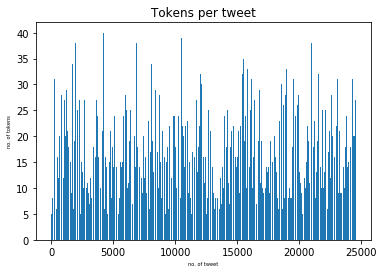

In [99]:
tokenx = np.arange(data.shape[0])
plt.bar(tokenx,tokensarray)
plt.xlabel('no. of tweet', fontsize = 5)
plt.ylabel('no. of tokens', fontsize = 5)
plt.title('Tokens per tweet')
plt.show()

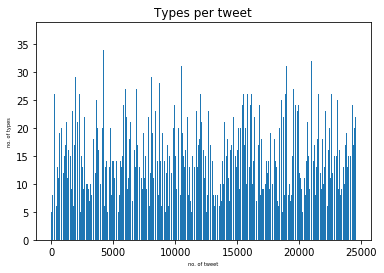

In [100]:
tokenx = np.arange(data.shape[0])
plt.bar(tokenx,freqarray)
plt.xlabel('no. of tweet', fontsize = 5)
plt.ylabel('no. of types', fontsize = 5)
plt.title('Types per tweet')
plt.show()

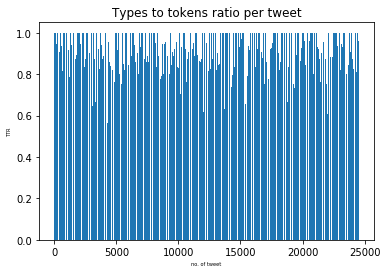

In [101]:
tokenx = np.arange(data.shape[0])
plt.bar(tokenx,np.divide(freqarray,tokensarray))
plt.xlabel('no. of tweet', fontsize = 5)
plt.ylabel('TTR', fontsize = 5)
plt.title('Types to tokens ratio per tweet')
plt.show()

## Question 3

In [112]:
cumtokenlist = []
cumlist = []
cumtypelist = []
temptoken = []
cumtoken = 0
for i in range(data.shape[0]):
    temptoken = temptoken + word_tokenize(data["Sentence"][i].lower())
    if((i%500) == 0):
        cumtoken = cumtoken + len(temptoken)
        cumlist = cumlist + temptoken
        cumtokenlist.append(cumtoken)
        cumtypelist.append(len(np.unique(np.array(cumlist),return_counts = False)))
        temptoken = []
    else:
        continue

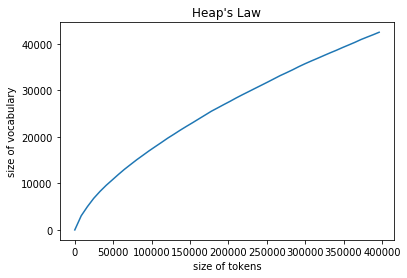

In [113]:
plt.plot(cumtokenlist, cumtypelist)
plt.xlabel("size of tokens",fontsize=10)
plt.ylabel("size of vocabulary", fontsize = 10)
plt.title("Heap's Law")
plt.show()

### Total number of tokens is 396436 and total number of types is 49518 and average TTR is 0.125

## Question 2

In [124]:
totaltypes, totalcounts = np.unique(np.array(cumlist), return_counts=True)
selectedwords = ["i","on","run","the","come","face","free","will","root","power","white","glass","heads","degree","states","temple"]
nummeanings = [1,2,3,1,1,3,2,2,4,3,4,2,3,4,3,3]
selectedlengths = [1,2,3,3,4,4,4,4,4,5,5,5,5,6,6,6]
selectedcounts = []
for i in selectedwords:
    ind = np.where(totaltypes == i)[0]
    selectedcounts.append(totalcounts[ind][0])

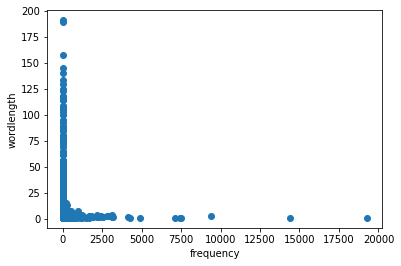

In [125]:
plt.plot(totalcounts, tokenlengths, 'o')
plt.xlabel("frequency",fontsize = 10)
plt.ylabel("wordlength", fontsize = 10)
plt.show()

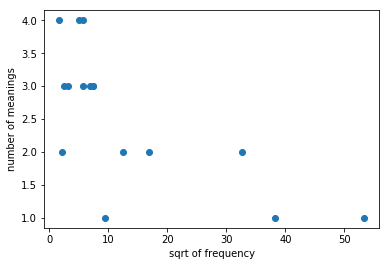

In [126]:
plt.plot(np.sqrt(selectedcounts), nummeanings, 'o')
plt.xlabel("sqrt of frequency",fontsize = 10)
plt.ylabel("number of meanings", fontsize = 10)
plt.show()

### As we can see here, the curve between the length and the frequency shows that length is inversely proportional to frequency. This shows that Zipf's law holds true for the length.
### Also, we can see that there is no trend in the relationship between the number of meanings of a word and its frequency. This shows that Zipf's Law did not hold for the meanings (This might also be due to the less dataset available. )